<h1> Trabalho Regressão Linear </h1>

<h3>Aline Freire de Rezende - 116110571</h3>
<h3>Larissa Monteiro da Fonseca Galeno - 116083017</h3>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
import numpy as np  # biblioteca que suporta arrays e matrizes multidimensionais - https://numpy.org/
from sklearn import preprocessing # usado para preprocessar a base de dados (normalização)
import matplotlib.pyplot as plt # biblioteca para plotar gráficos
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Base do Titanic

A base de dados do Titanic foi extraida do Kagle (https://www.kaggle.com/heptapod/titanic), porém precisamos arrumar a base para que fosse possível fazer o trbalho. Assim, deletamos as colunas que só tinham valores 0 e as linhas que tinham valores faltando, ficando, assim com o seguinte dataset: https://drive.google.com/file/d/1fq1U8iVNZ8KvrlCVY2yoWKeNJasXXKTV/view?usp=sharing

Os atributos do dataset possuem os seguintes significados:

**PassengerId**: ID do passageiro <br>
**Age**: Idade em anos (se está estimado tem .5) <br>
**Fare**: Preço da passagem <br>
**Sex**: gênero (0 para homens, 1 para mulheres) <br>
**Sibsip**: número de parentes e/ou cônjugues <br>
**Parch**: número de pais e/ou filhos embarcados <br>
**Pclass**: classe do Ticket (1 para primeira classe; 2 para segunda classe; 3 para terceira classe) <br>
**Embarked**: porto que embarcou (0 para Cherbourg; 1 para Queenstown; 2 para Southampton) <br>
**Survived**: se sobreviveu (0 para não, 1 para sim)

In [6]:

#Lendo o data set https://drive.google.com/file/d/1fq1U8iVNZ8KvrlCVY2yoWKeNJasXXKTV/view?usp=sharing
data = pd.read_excel("/content/drive/MyDrive/Trab_Regressao/titanic_survive.xlsx")

#configurando gráficos
plt.rc("font", size=14)

# Descobrir quais atributos tem uma relação linear com Survived (que é o nosso classificador)
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
data.corr(method='pearson')

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,survived
Passengerid,1.000000,0.025792,0.031945,-0.012297,-0.055696,0.008576,-0.039776,-0.051518,-0.331125
Age,0.025792,1.000000,0.176554,-0.057161,-0.189332,-0.125112,-0.375811,-0.065125,-0.060236
Fare,0.031945,0.176554,1.000000,0.184192,0.161141,0.222422,-0.557915,-0.239212,0.171942
Sex,-0.012297,-0.057161,0.184192,1.000000,0.110768,0.214371,-0.121826,-0.099408,0.401985
sibsp,-0.055696,-0.189332,0.161141,0.110768,1.000000,0.373383,0.059819,0.066055,-0.013174
Parch,0.008576,-0.125112,0.222422,0.214371,0.373383,1.000000,0.017304,0.045216,0.056183
Pclass,-0.039776,-0.375811,-0.557915,-0.121826,0.059819,0.017304,1.000000,0.187349,-0.241672
Embarked,-0.051518,-0.065125,-0.239212,-0.099408,0.066055,0.045216,0.187349,1.000000,-0.093225
survived,-0.331125,-0.060236,0.171942,0.401985,-0.013174,0.056183,-0.241672,-0.093225,1.000000


Utilizamos o método de Pearson para interpretar e ver se os atributos tinham uma relação linear com Survived. Segue o que usamos como referência para entender o método:


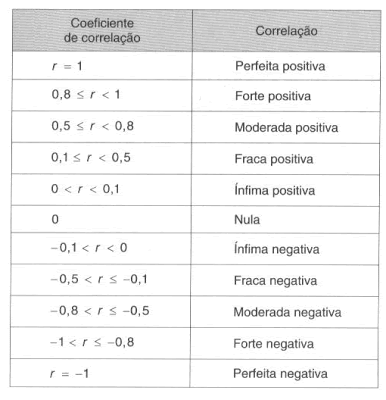

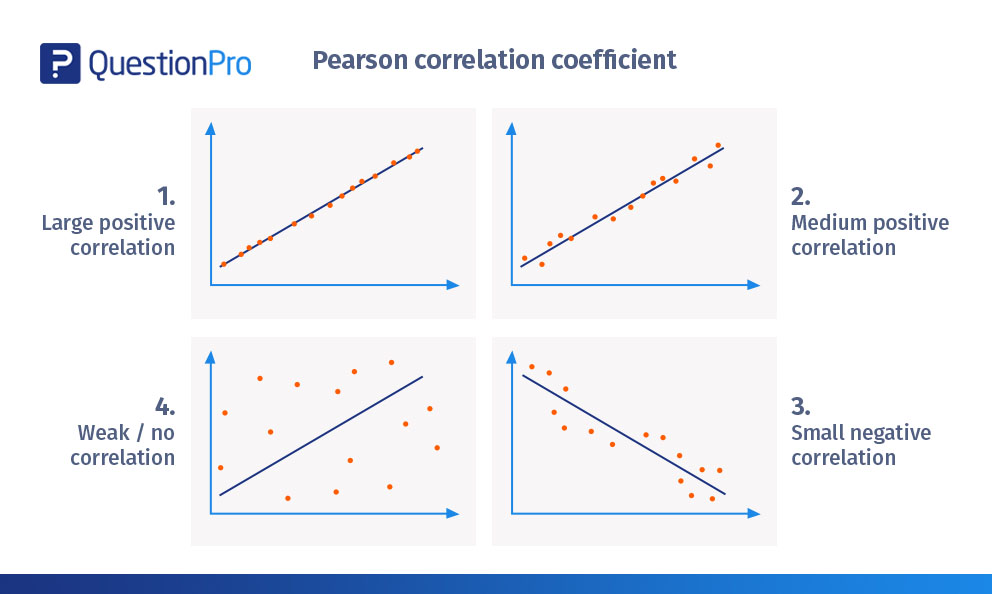

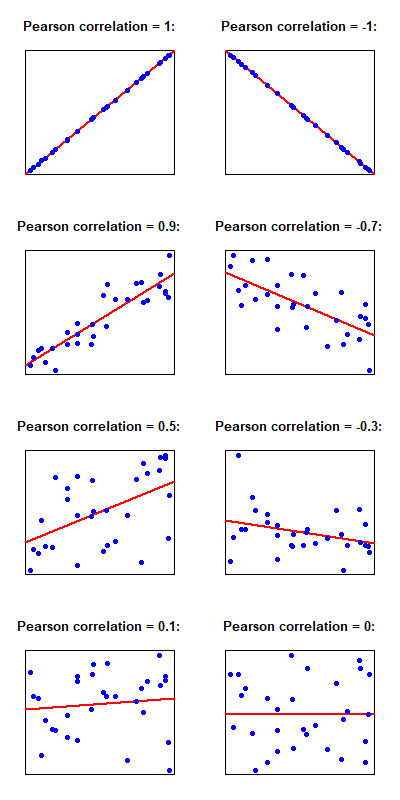

Age x survived


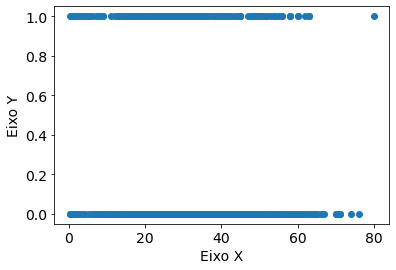


Fare x survived


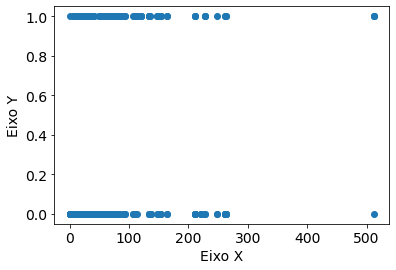


Sex x survived


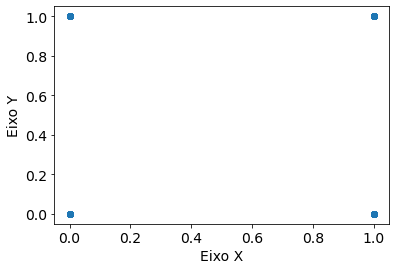


sibsp x survived


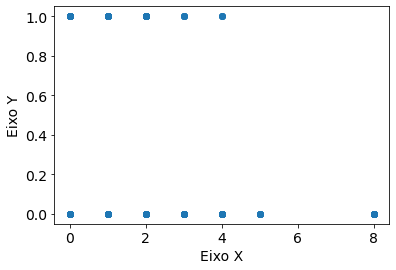


Parch x survived


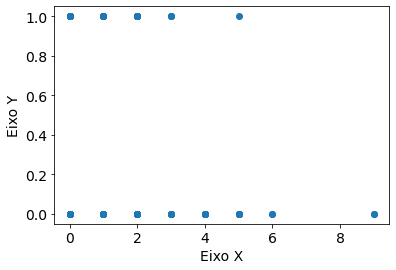


Pclass x survived


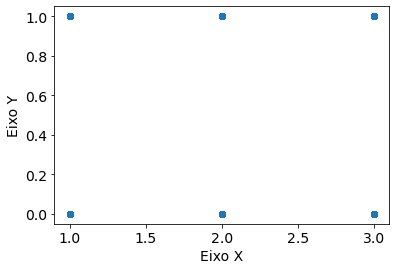


Embarked x survived


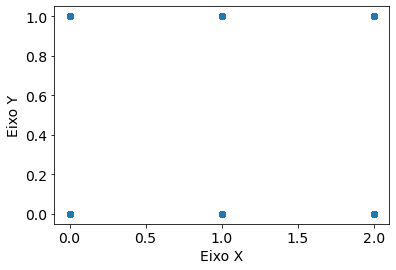

In [8]:
##  Plotando os Gráficos Atributos x Survived ##

print("Age x survived")
plt.scatter(data['Age'], data['survived'],cmap='red')
# rótulo dos eixos e salvando o arquivo com a imagem
plt.xlabel("Eixo X")
plt.ylabel("Eixo Y")
plt.savefig('pontos.png')
plt.show()

print()

print("Fare x survived")
plt.scatter(data['Fare'], data['survived'],cmap='red')
# rótulo dos eixos e salvando o arquivo com a imagem
plt.xlabel("Eixo X")
plt.ylabel("Eixo Y")
plt.savefig('pontos.png')
plt.show()

print()

print("Sex x survived")
plt.scatter(data['Sex'], data['survived'],cmap='red')
# rótulo dos eixos e salvando o arquivo com a imagem
plt.xlabel("Eixo X")
plt.ylabel("Eixo Y")
plt.savefig('pontos.png')
plt.show()

print()

print("sibsp x survived")
plt.scatter(data['sibsp'], data['survived'],cmap='red')
# rótulo dos eixos e salvando o arquivo com a imagem
plt.xlabel("Eixo X")
plt.ylabel("Eixo Y")
plt.savefig('pontos.png')
plt.show()

print()

print("Parch x survived")
plt.scatter(data['Parch'], data['survived'],cmap='red')
# rótulo dos eixos e salvando o arquivo com a imagem
plt.xlabel("Eixo X")
plt.ylabel("Eixo Y")
plt.savefig('pontos.png')
plt.show()

print()

print("Pclass x survived")
plt.scatter(data['Pclass'], data['survived'],cmap='red')
# rótulo dos eixos e salvando o arquivo com a imagem
plt.xlabel("Eixo X")
plt.ylabel("Eixo Y")
plt.savefig('pontos.png')
plt.show()

print()

print("Embarked x survived")
plt.scatter(data['Embarked'], data['survived'],cmap='red')
# rótulo dos eixos e salvando o arquivo com a imagem
plt.xlabel("Eixo X")
plt.ylabel("Eixo Y")
plt.savefig('pontos.png')
plt.show()

Para ver se os atributos tem uma relação Linear, utlizamos o coeficiente de correlação e Pearson, a partir da função data.corr(melhor='pearson'). E assim, a partir da tabela e de imagens exemplos pudemos interepretar os dados. 


Com isso, vimos que nenhum dos nossos atributos apresentava ter uma relação linear com a coluna "survived". Para verificar, plotamos os gráficos de cada atributo x survived, atestando que não tinha uma relação linear. 

Essa conclusão era algo que esperávamos já que o nosso resultado são valores binários (0 para não sobreviveu e 1 para sobreviveu).

# Tentando com uma nova base de dados

Como com a base do Titanic não foi possível usar a regressão linear, escolhemos outra base para fazer. Selecionamos "World Happiness Report" (https://www.kaggle.com/unsdsn/world-happiness?select=2019.csv) e utilizamos os dados do ano de 2019. Segue o link do dataset: https://drive.google.com/file/d/17goLcDnkSIDrukFClsxVqZLzwuR-cZ4O/view?usp=sharing

In [9]:
#Lendo o data set https://drive.google.com/file/d/1fq1U8iVNZ8KvrlCVY2yoWKeNJasXXKTV/view?usp=sharing
data_happy = pd.read_csv("/content/drive/MyDrive/Trab_Regressao/2019.csv")

#configurando gráficos
plt.rc("font", size=14)

# Descobrir quais atributos tem uma relação linear com Survived (que é o nosso classificador)
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
data_happy.corr(method='pearson')

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.989096,-0.801947,-0.767465,-0.787411,-0.546606,-0.047993,-0.351959
Score,-0.989096,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,-0.801947,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,-0.767465,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,-0.787411,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,-0.546606,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,-0.047993,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,-0.351959,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


Vendo a tabela e levando em consideração o método de Pearson vimos que o Overall rank, GDP Per capita, Social Support e Health life expectancy são candidatos para ter uma relação Linear com Score dado o resultado do coeficiente e tendo em vista as tabelas apresentadas acima. 

Entendemos que esses atributos não formam uma relação completamente linear (se fosse o coeficiente teria que ser ou estar entre 0.8 e 1 ou -1 e -0.8), mas por terem dado resultados próximos os consideramos. 

Com isso, para verificarmos a relação, platamos os gráficos dos Atributos x Score.

Overall rank x Score


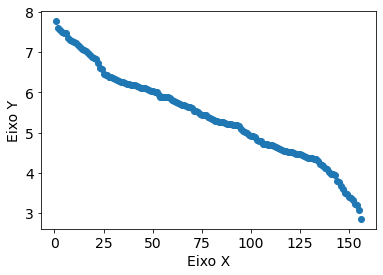


GDP per capita x Score


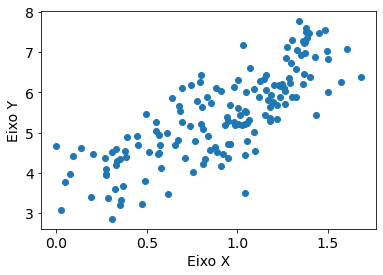


Social support x Score


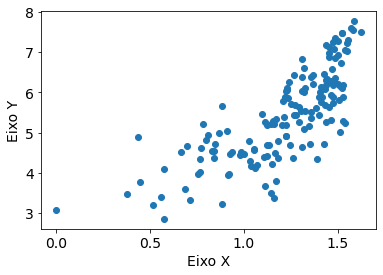


Healthy life expectancy x Score


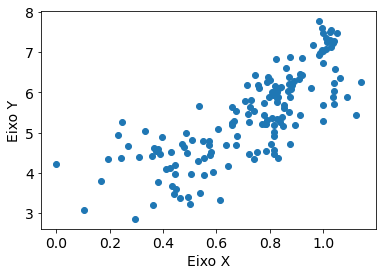

In [10]:
##  Plotando os Gráficos Atributos x Score ##

print("Overall rank x Score")
plt.scatter(data_happy['Overall rank'], data_happy['Score'],cmap='red')
# rótulo dos eixos e salvando o arquivo com a imagem
plt.xlabel("Eixo X")
plt.ylabel("Eixo Y")
plt.savefig('pontos.png')
plt.show()

print()

print("GDP per capita x Score")
plt.scatter(data_happy['GDP per capita'], data_happy['Score'],cmap='red')
# rótulo dos eixos e salvando o arquivo com a imagem
plt.xlabel("Eixo X")
plt.ylabel("Eixo Y")
plt.savefig('pontos.png')
plt.show()

print()

print("Social support x Score")
plt.scatter(data_happy['Social support'], data_happy['Score'],cmap='red')
# rótulo dos eixos e salvando o arquivo com a imagem
plt.xlabel("Eixo X")
plt.ylabel("Eixo Y")
plt.savefig('pontos.png')
plt.show()

print()

print("Healthy life expectancy x Score")
plt.scatter(data_happy['Healthy life expectancy'], data_happy['Score'],cmap='red')
# rótulo dos eixos e salvando o arquivo com a imagem
plt.xlabel("Eixo X")
plt.ylabel("Eixo Y")
plt.savefig('pontos.png')
plt.show()



Erro quadrático médio:  0.026700777534437743


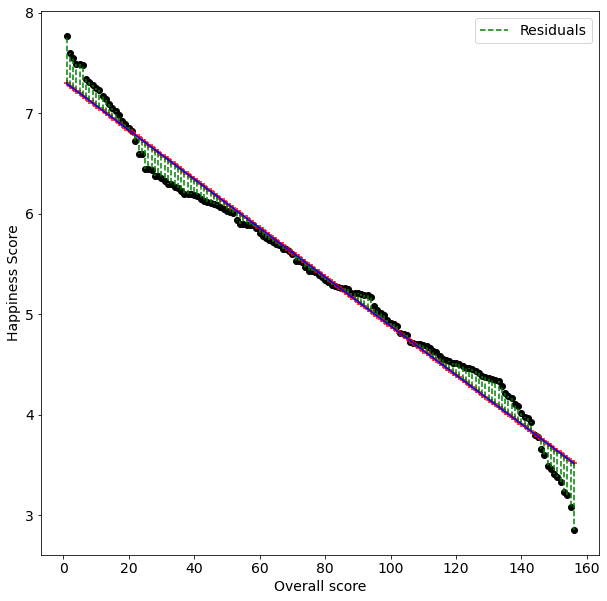

In [11]:
## Overall rank ##

#transformando X e Y para numpy array. Ele precisa ser bidimensional (-1,1)
X = data_happy.iloc[:, 0].values.reshape(-1, 1) 
Y = data_happy.iloc[:, 2].values.reshape(-1, 1) 

reg = LinearRegression()
reg.fit(X, Y) #Esse X e Y estão separados entre teste e treino? Nesse caso não tem separação de teste e treino
y_pred = reg.predict(X) #esse predict vale de algo?

#Plot
plt.figure(figsize=[10,10])
plt.scatter(X, Y, color='black')
plt.scatter(X, y_pred,marker='+',color='red')
space_for_residual = reg.predict(X).reshape(-1,1)
plt.xlabel("Overall score")
plt.ylabel("Happiness Score")
plt.vlines(X, space_for_residual, Y, linestyles="--", colors="green", label="Residuals")
plt.legend()
plt.plot(X, y_pred, color='blue')

print("Erro quadrático médio: ", mean_squared_error(Y, y_pred)) #quais parâmetros coloco aqui nesse caso que não tem split?



Notamos que, de fato, o erro quadrático médio deu muito baixo. Associamos isso pela relação do Overall rank com Score se comportar quase linearmente. 

Erro quadrático médio:  0.4551967397324353


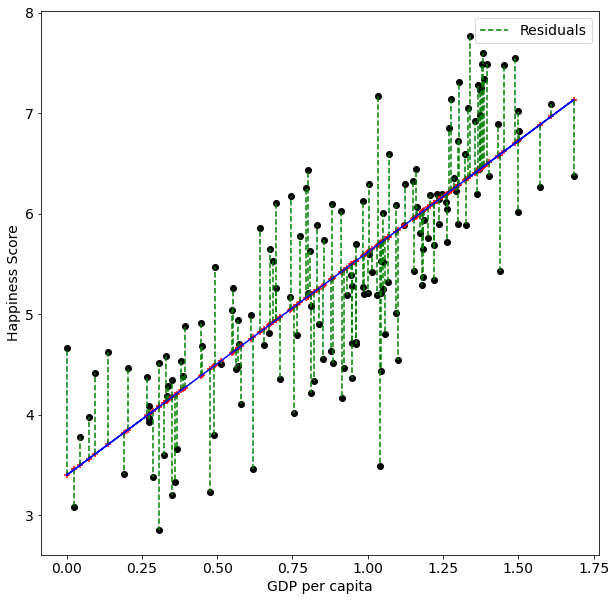

In [12]:
## GDP per capita ##

X = data_happy.iloc[:, 3].values.reshape(-1, 1) 
Y = data_happy.iloc[:, 2].values.reshape(-1, 1) 

reg = LinearRegression()
reg.fit(X, Y) #Esse X e Y estão separados entre teste e treino? Nesse caso não tem separação de teste e treino
y_pred = reg.predict(X) #esse predict vale de algo?

#Plot
plt.figure(figsize=[10,10])
plt.scatter(X, Y, color='black')
plt.scatter(X, y_pred,marker='+',color='red')
space_for_residual = reg.predict(X).reshape(-1,1)
plt.xlabel("GDP per capita")
plt.ylabel("Happiness Score")
plt.vlines(X, space_for_residual, Y, linestyles="--", colors="green", label="Residuals")
plt.legend()
plt.plot(X, y_pred, color='blue')

print("Erro quadrático médio: ", mean_squared_error(Y, y_pred)) #quais parâmetros coloco aqui nesse caso que não tem split?



Erro quadrático médio:  0.48773601545509554


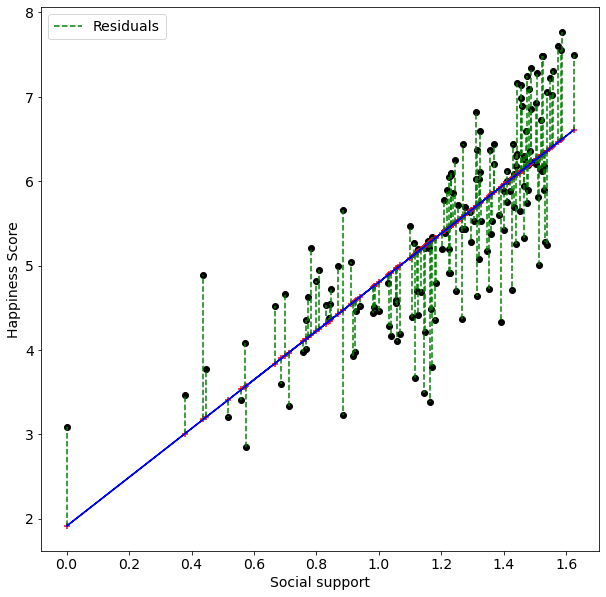

In [13]:
## Social support ##

X = data_happy.iloc[:, 4].values.reshape(-1, 1) 
Y = data_happy.iloc[:, 2].values.reshape(-1, 1) 

reg = LinearRegression()
reg.fit(X, Y) #Esse X e Y estão separados entre teste e treino? Nesse caso não tem separação de teste e treino
y_pred = reg.predict(X) #esse predict vale de algo?

#Plot
plt.figure(figsize=[10,10])
plt.scatter(X, Y, color='black')
plt.scatter(X, y_pred,marker='+',color='red')
space_for_residual = reg.predict(X).reshape(-1,1)
plt.xlabel("Social support")
plt.ylabel("Happiness Score")
plt.vlines(X, space_for_residual, Y, linestyles="--", colors="green", label="Residuals")
plt.legend()
plt.plot(X, y_pred, color='blue')

print("Erro quadrático médio: ", mean_squared_error(Y, y_pred)) #quais parâmetros coloco aqui nesse caso que não tem split?

Erro quadrático médio:  0.48232053390132396


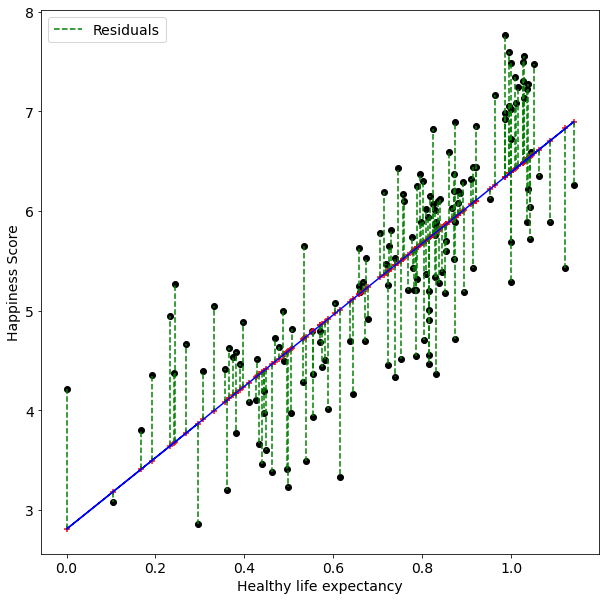

In [14]:
## Healthy life expectancy ##

X = data_happy.iloc[:, 5].values.reshape(-1, 1) 
Y = data_happy.iloc[:, 2].values.reshape(-1, 1) 

reg = LinearRegression()
reg.fit(X, Y) #Esse X e Y estão separados entre teste e treino? Nesse caso não tem separação de teste e treino
y_pred = reg.predict(X) #esse predict vale de algo?

#Plot
plt.figure(figsize=[10,10])
plt.scatter(X, Y, color='black')
plt.scatter(X, y_pred,marker='+',color='red')
space_for_residual = reg.predict(X).reshape(-1,1)
plt.xlabel("Healthy life expectancy")
plt.ylabel("Happiness Score")
plt.vlines(X, space_for_residual, Y, linestyles="--", colors="green", label="Residuals")
plt.legend()
plt.plot(X, y_pred, color='blue')

print("Erro quadrático médio: ", mean_squared_error(Y, y_pred)) #quais parâmetros coloco aqui nesse caso que não tem split?

Vimos alguns resultados do Kagle, como o https://www.kaggle.com/furkanuysl/regression-with-scikit-learn-beginner e percebemos que o usuário também usou o GDP per capita para fazer a regressão linear, porém usou um método diferente para calcular o erro. 

Era esperado que o erro dos atributos, com exceção do Overall rank, dessem maiores, por conta da relação deles com Score ser "pouco" linear. 